In [1]:
%load_ext autoreload
%autoreload 2

In [12]:
from model_selection import top_model_confusion
from utils import serialize, deserialize, serialize_model, deserialize_model

encoder = 'COLLAPSE'
metal = 'ZN'
metric_str = "precision"
results_cache_dir = f"../data/{encoder}_{metal}_gridsearch_results/{encoder}-eval_results"
model_cache_dir = f"../data/{encoder}_{metal}_gridsearch_results/{encoder}-fitted_k2_models"
linearized_cache_dir = f"../data/{encoder}_{metal}_gridsearch_results/{encoder}-linearized_data"

top_model_confusion(metric_str,results_cache_dir, model_cache_dir, eval_class=1)

('k15_r0_cutoff6.00_alpha0.500_tau0.00_lamnan.model',
 0.9,
 0.3041668074688543,
 0.3041668074688543)

In [13]:
confusion_all_models = deserialize(f"../data/results/{metal}_confusion_all_train_models.pkl")
confusion_class1_models = deserialize(f"../data/results/{metal}_confusion_class1_train_models.pkl")
datum_level_models = deserialize(f"../data/results/{metal}_datum_level_train_models.pkl")
continuous_avg_models = deserialize(f"../data/results/{metal}_continuous_avg_train_models.pkl")
continuous_iid_models = deserialize(f"../data/results/{metal}_continuous_iid_train_models.pkl")

FileNotFoundError: [Errno 2] No such file or directory: '../data/results/ZN_confusion_all_train_models.pkl'

In [4]:
confusion_class1_models

{'msd': ('k20_r0_cutoff8.00_alpha0.001_tau2.00_lamnan.model', 0.0),
 'specificity': ('k20_r1_cutoff6.00_alpha0.100_tau2.00_lamnan.model', 0.5),
 'precision': ('k20_r2_cutoff6.00_alpha0.100_tau0.00_lamnan.model', 0.9),
 'fnr': ('k20_r1_cutoff6.00_alpha0.100_tau2.00_lamnan.model', 0.5),
 'fdr': ('k20_r2_cutoff4.00_alphanan_taunan_lam0.50.model', 0.9),
 'recall': ('k20_r1_cutoff6.00_alpha0.100_tau2.00_lamnan.model', 0.0),
 'accuracy': ('k20_r1_cutoff6.00_alpha0.100_tau2.00_lamnan.model', 0.5),
 'balanced_acc': ('k20_r0_cutoff4.00_alphanan_taunan_lam0.50.model', 0.6),
 'correlation': ('k20_r4_cutoff6.00_alpha0.001_tau0.00_lamnan.model', 0.9),
 'threat_score': ('k20_r4_cutoff6.00_alpha0.001_tau0.00_lamnan.model', 0.9),
 'prevalence': ('k20_r1_cutoff6.00_alpha0.100_tau2.00_lamnan.model', 0.0),
 'dice': ('k20_r4_cutoff6.00_alpha0.001_tau0.00_lamnan.model', 0.9),
 'jaccard': ('k20_r4_cutoff6.00_alpha0.001_tau0.00_lamnan.model', 0.9)}

In [ ]:
from model_selection import k_hop_precision
for encoder in ['COLLAPSE', 'ESM', 'AA']:
    results_cache_dir = f"../data/{encoder}_{metal}_gridsearch_results/{encoder}-eval_results"
    model_cache_dir = f"../data/{encoder}_{metal}_gridsearch_results/{encoder}-fitted_k2_models"
    linearized_cache_dir = f"../data/{encoder}_{metal}_gridsearch_results/{encoder}-linearized_data"
    graph_base_dir = f"../data/COLLAPSE_{metal}_cutoff_train_graphs"

    results = k_hop_precision('protein', results_cache_dir, linearized_cache_dir, model_cache_dir, graph_base_dir, eval_class='both')
    
    print(encoder, results)
    """
    
for encoder in ['COLLAPSE', 'ESM', 'AA']:
    results_cache_dir = f"../data/{encoder}_{metal}_gridsearch_results/{encoder}-eval_results"
    model_cache_dir = f"../data/{encoder}_{metal}_gridsearch_results/{encoder}-fitted_k2_models"
    linearized_cache_dir = f"../data/{encoder}_{metal}_gridsearch_results/{encoder}-linearized_data"
    graph_base_dir = f"../data/{encoder}_{metal}_cutoff_train_graphs"

    results = k_hop_precision('protein', results_cache_dir, linearized_cache_dir, model_cache_dir, graph_base_dir, eval_class=1)
    print(encoder, results)
    """

In [38]:
valid_metrics = ["msd", "specificity", "precision", "fnr", "fdr", "recall", "accuracy", "balanced_acc", "correlation", "threat_score", "prevalence", "dice", "jaccard"]
for metric_str in valid_metrics:
    print(metric_str)
    results = top_model_confusion(metric_str,results_cache_dir, model_cache_dir)
    print(results)

msd
('k20_r0_cutoff8.00_alpha0.001_tau2.00_lamnan.model', '>', 361.22301951779565)
specificity
('k10_r0_cutoff4.00_alpha0.001_tau0.00_lamnan.model', 1.0, 1.0)
precision
('k20_r2_cutoff6.00_alpha0.100_tau0.00_lamnan.model', 0.9, 0.027639492988932958)
fnr
('k10_r0_cutoff4.00_alpha0.001_tau0.00_lamnan.model', 1.0, 0.48679678530424797)
fdr
('k15_r1_cutoff4.00_alphanan_taunan_lam0.50.model', 0.9, 0.9976602850353525)
recall
('k20_r1_cutoff6.00_alpha0.100_tau2.00_lamnan.model', 0.0, 1.0)
accuracy
('k10_r0_cutoff4.00_alpha0.001_tau0.00_lamnan.model', 1.0, 0.9929412145133447)
balanced_acc
('k20_r2_cutoff6.00_alpha0.100_tau0.00_lamnan.model', 0.9, 0.5104395595671256)
correlation
('k20_r0_cutoff8.00_alpha0.001_tau0.00_lamnan.model', 0.9, 0.03524971449809501)
threat_score


/oak/stanford/groups/rbaltman/aderry/K2/src/metrics.py:104: RuntimeWarning: invalid value encountered in scalar divide
  return tp / (tp + fn + fp)


('k20_r0_cutoff8.00_alpha0.001_tau0.00_lamnan.model', 0.9, 0.018289480717047984)
prevalence
('k10_r0_cutoff4.00_alpha0.001_tau0.00_lamnan.model', 0.0, 0.007058785486655712)
dice
('k15_r1_cutoff4.00_alpha0.100_tau2.00_lamnan.model', '<', 0.5132626435597806)
jaccard
('k15_r1_cutoff4.00_alpha0.100_tau2.00_lamnan.model', '<', 0.5132331635114069)


In [39]:
valid_metrics = ["msd", "specificity", "precision", "fnr", "fdr", "recall", "accuracy", "balanced_acc", "correlation", "threat_score", "prevalence", "dice", "jaccard"]
for metric_str in valid_metrics:
    print(metric_str)
    results = top_model_confusion(metric_str, results_cache_dir, model_cache_dir, eval_class=0)
    print(results)

msd
('k20_r0_cutoff8.00_alpha0.001_tau2.00_lamnan.model', '>', 343.8249440715884)
specificity
('k10_r0_cutoff4.00_alpha0.001_tau0.00_lamnan.model', 1.0, 1.0)
precision
('k10_r0_cutoff4.00_alpha0.001_tau0.00_lamnan.model', 0.0, 0.0)
fnr
('k10_r0_cutoff4.00_alpha0.001_tau0.00_lamnan.model', 0.0, 0.0)
fdr
('k10_r0_cutoff4.00_alpha0.001_tau0.00_lamnan.model', 0.0, 1.0)
recall
('k10_r0_cutoff4.00_alpha0.001_tau0.00_lamnan.model', 0.0, 1.0)
accuracy
('k10_r0_cutoff4.00_alpha0.001_tau0.00_lamnan.model', 1.0, 1.0)
balanced_acc
('k10_r0_cutoff4.00_alpha0.001_tau0.00_lamnan.model', 0.0, 0.5)
correlation
('k10_r0_cutoff4.00_alpha0.001_tau0.00_lamnan.model', 0.0, 0.0)
threat_score
('k10_r0_cutoff4.00_alpha0.001_tau0.00_lamnan.model', 0.0, 0.0)
prevalence
('k10_r0_cutoff4.00_alpha0.001_tau0.00_lamnan.model', 0.0, 0.0)
dice
('k10_r0_cutoff4.00_alpha0.001_tau0.00_lamnan.model', 1.0, 1.0)
jaccard
('k10_r0_cutoff4.00_alpha0.001_tau0.00_lamnan.model', 1.0, 1.0)


In [14]:
valid_metrics = ["msd", "specificity", "precision", "fnr", "fdr", "recall", "accuracy", "balanced_acc", "correlation", "threat_score", "prevalence", "dice", "jaccard"]
for metric_str in valid_metrics:
    print(metric_str)
    results = top_model_confusion(metric_str, results_cache_dir, model_cache_dir, eval_class=1)
    print(results)

msd
('k15_r2_cutoff6.00_alpha0.100_tau0.00_lamnan.model', 0.0, 315.8590909090909, 315.8590909090909)
specificity
('k25_r4_cutoff4.00_alpha10000000000.000_tau2.00_lamnan.model', 1.0, 1.0, 0.7515132105463032)
precision
('k15_r0_cutoff6.00_alpha0.500_tau0.00_lamnan.model', 0.9, 0.3041668074688543, 0.3041668074688543)
fnr
('k25_r4_cutoff4.00_alpha10000000000.000_tau2.00_lamnan.model', 1.0, 1.0, 0.9757319223985891)
fdr
('k15_r4_cutoff4.00_alphanan_taunan_lam0.50.model', 0.5, 0.9832821100673487, 0.9832821100673487)
recall
('k20_r4_cutoff4.00_alpha0.001_tau0.00_lamnan.model', 0.0, 1.0, 1.0)
accuracy
('k25_r0_cutoff4.00_alpha0.010_tau2.00_lamnan.model', 0.9, 0.9890565010244482, 0.6742095176662541)
balanced_acc
('k25_r0_cutoff4.00_alphanan_taunan_lam0.50.model', 0.5, 0.6824292907063454, 0.20249396245272494)
correlation
('k20_r0_cutoff4.00_alpha0.001_tau0.00_lamnan.model', 0.9, 0.283302755744555, 0.43019888279702956)
threat_score
('k25_r0_cutoff4.00_alpha0.010_tau2.00_lamnan.model', 0.9, 0.25042

In [15]:
from model_selection import top_model_preds
valid_metrics = ["auroc", "auprc", "ap"]
for metric_str in valid_metrics:
    print(metric_str)
    results = top_model_preds(metric_str, results_cache_dir, model_cache_dir)
    print(results)

auroc
('k15_r0_cutoff4.00_alpha0.500_tau1.00_lamnan.model', 0.6417658365026786)
auprc
('k15_r0_cutoff4.00_alpha0.500_tau1.00_lamnan.model', 0.7503116923180316)
ap
('k15_r1_cutoff4.00_alpha0.001_tau2.00_lamnan.model', 0.6186558235373336)


In [16]:
from model_selection import top_model_continuous_avg
valid_metrics = ["auroc", "auprc", "ap"]
for metric_str in valid_metrics:
    print(metric_str)
    results = top_model_continuous_avg(metric_str, results_cache_dir, model_cache_dir)
    print(results)

auroc
('k30_r0_cutoff4.00_alphanan_taunan_lam0.50.model', 0.6973103715675234)
auprc
('k15_r0_cutoff4.00_alpha0.500_tau1.00_lamnan.model', 0.623781770088546)
ap
('k30_r0_cutoff4.00_alpha10000000000.000_tau0.00_lamnan.model', 0.28177340947313906)


In [20]:
from model_selection import top_model_continuous_iid
valid_metrics = ["auroc", "auprc", "ap"]
for metric_str in valid_metrics:
    print(metric_str)
    results = top_model_continuous_iid(metric_str, model_cache_dir, linearized_cache_dir)
    print(results)

auroc
('k15_r0_cutoff4.00_alpha0.500_tau1.00_lamnan.model', 0.722221562467037)
auprc
('k15_r0_cutoff4.00_alpha0.500_tau1.00_lamnan.model', 0.4308754654861674)
ap
('k25_r0_cutoff4.00_alpha0.010_tau2.00_lamnan.model', 0.293951822492335)


In [8]:
encoder = 'COLLAPSE'
metal = 'ZN'

results_cache_dir = f"../data/{encoder}_{metal}_baseline-GAT_gridsearch_results/{encoder}-eval_results"
model_cache_dir = f"../data/{encoder}_{metal}_baseline-GAT_gridsearch_results/{encoder}-fitted_k2_models"
linearized_cache_dir = f"../data/{encoder}_{metal}_baseline-GAT_gridsearch_results/{encoder}-linearized_data"

In [9]:
valid_metrics = ["msd", "specificity", "precision", "fnr", "fdr", "recall", "accuracy", "balanced_acc", "correlation", "threat_score", "prevalence", "dice", "jaccard"]
for metric_str in valid_metrics:
    print(metric_str)
    results = top_model_confusion(metric_str,results_cache_dir, model_cache_dir)
    print(results)

msd
('COLLAPSE-ZN-6.0-1e-05', 0.0, 151.0, 151.0)
specificity
('COLLAPSE-ZN-6.0-1e-05', 0.8, 1.0, 1.0)
precision
('COLLAPSE-ZN-6.0-1e-05', 0.0, 0.0, 0.0)
fnr
('COLLAPSE-ZN-6.0-1e-05', 0.0, 0.0, 0.0)
fdr
('COLLAPSE-ZN-6.0-1e-05', 0.0, 1.0, 1.0)
recall
('COLLAPSE-ZN-6.0-1e-05', 0.0, 1.0, 0.0)
accuracy
('COLLAPSE-ZN-6.0-1e-05', 0.8, 1.0, 1.0)
balanced_acc
('COLLAPSE-ZN-6.0-1e-05', 0.0, nan, nan)
correlation
('COLLAPSE-ZN-6.0-1e-05', 0.0, 0.0, 0.0)
threat_score
('COLLAPSE-ZN-6.0-1e-05', 0.0, 0.0, 0.0)
prevalence
('COLLAPSE-ZN-6.0-1e-05', 0.0, 0.0, 0.0)
dice
('COLLAPSE-ZN-6.0-1e-05', 0.8, 1.0, 1.0)
jaccard
('COLLAPSE-ZN-6.0-1e-05', 0.8, 1.0, 1.0)


In [11]:
valid_metrics = ["msd", "specificity", "precision", "fnr", "fdr", "recall", "accuracy", "balanced_acc", "correlation", "threat_score", "prevalence", "dice", "jaccard"]
for metric_str in valid_metrics:
    print(metric_str)
    results = top_model_confusion(metric_str, results_cache_dir, model_cache_dir, eval_class=1)
    print(results)

msd
0


UnboundLocalError: local variable 'model_cms' referenced before assignment

## Ranking gridsearch models

In [125]:
import pandas as pd

encoder = 'AA'
metal = 'ZN'

results_cache_dir = f"../data/{encoder}_{metal}_gridsearch_results/{encoder}-eval_results"
model_cache_dir = f"../data/{encoder}_{metal}_gridsearch_results/{encoder}-fitted_k2_models"
processor_cache_dir = f"../data/{encoder}_{metal}_gridsearch_results/{encoder}-fitted_k2_processors"
linearized_cache_dir = f"../data/{encoder}_{metal}_gridsearch_results/{encoder}-linearized_data"

In [126]:
key_conf_metrics = ["precision", "balanced_acc", "correlation", "dice"]
key_cont_metrics = ["auprc"]

In [127]:
from model_selection import top_model_confusion, top_model_continuous_avg
conf_res = []
for metric in key_conf_metrics:
    print(metric)
    res = top_model_confusion(metric,results_cache_dir, model_cache_dir, eval_class=1, return_all=True)
    res["metric"] = [metric]*len(res)
    conf_res.append(res)
conf_res = pd.concat(conf_res)

cont_res = []
for metric in key_cont_metrics:
    print(metric)
    res = top_model_continuous_avg(metric, results_cache_dir, model_cache_dir, return_all=True)
    res["metric"] = [metric]*len(res)
    cont_res.append(res)
cont_res = pd.concat(cont_res)

precision
balanced_acc
correlation
dice
auprc


In [128]:
conf_pvt = conf_res.pivot(index=['model_name', 'threshold'], columns='metric', values='score')
conf_pvt.sort_values(key_conf_metrics, ascending=False)

metric                                                        balanced_acc  \
model_name                                         threshold                 
k21_r1_cutoff8.00_alpha0.010_tau1.00_lamnan.model  0.9            0.562095   
k21_r1_cutoff8.00_alpha0.100_tau1.00_lamnan.model  0.9            0.562095   
k21_r1_cutoff8.00_alpha10000000000.000_tau1.00_... 0.9            0.562095   
k21_r1_cutoff8.00_alpha0.010_tau1.00_lamnan.model  0.8            0.582069   
k21_r1_cutoff8.00_alpha0.100_tau1.00_lamnan.model  0.8            0.582069   
...                                                                    ...   
k21_r0_cutoff8.00_alpha10000000000.000_tau1.00_... 0.5            0.499951   
                                                   0.6            0.499951   
                                                   0.7            0.499951   
                                                   0.8            0.499951   
                                                   0.9            0.499951   

metric                                                        correlation  \
model_name                                         threshold                
k21_r1_cutoff8.00_alpha0.010_tau1.00_lamnan.model  0.9           0.190294   
k21_r1_cutoff8.00_alpha0.100_tau1.00_lamnan.model  0.9           0.190294   
k21_r1_cutoff8.00_alpha10000000000.000_tau1.00_... 0.9           0.190294   
k21_r1_cutoff8.00_alpha0.010_tau1.00_lamnan.model  0.8           0.221921   
k21_r1_cutoff8.00_alpha0.100_tau1.00_lamnan.model  0.8           0.221921   
...                                                                   ...   
k21_r0_cutoff8.00_alpha10000000000.000_tau1.00_... 0.5          -0.000045   
                                                   0.6          -0.000045   
                                                   0.7          -0.000045   
                                                   0.8          -0.000045   
                                                   0.9          -0.000045   

metric                                                            dice  \
model_name                                         threshold             
k21_r1_cutoff8.00_alpha0.010_tau1.00_lamnan.model  0.9        0.170332   
k21_r1_cutoff8.00_alpha0.100_tau1.00_lamnan.model  0.9        0.170332   
k21_r1_cutoff8.00_alpha10000000000.000_tau1.00_... 0.9        0.170332   
k21_r1_cutoff8.00_alpha0.010_tau1.00_lamnan.model  0.8        0.210051   
k21_r1_cutoff8.00_alpha0.100_tau1.00_lamnan.model  0.8        0.210051   
...                                                                ...   
k21_r0_cutoff8.00_alpha10000000000.000_tau1.00_... 0.5        0.000000   
                                                   0.6        0.000000   
                                                   0.7        0.000000   
                                                   0.8        0.000000   
                                                   0.9        0.000000   

metric                                                        precision  
model_name                                         threshold             
k21_r1_cutoff8.00_alpha0.010_tau1.00_lamnan.model  0.9         0.336801  
k21_r1_cutoff8.00_alpha0.100_tau1.00_lamnan.model  0.9         0.336801  
k21_r1_cutoff8.00_alpha10000000000.000_tau1.00_... 0.9         0.336801  
k21_r1_cutoff8.00_alpha0.010_tau1.00_lamnan.model  0.8         0.335147  
k21_r1_cutoff8.00_alpha0.100_tau1.00_lamnan.model  0.8         0.335147  
...                                                                 ...  
k21_r0_cutoff8.00_alpha10000000000.000_tau1.00_... 0.5         0.000000  
                                                   0.6         0.000000  
                                                   0.7         0.000000  
                                                   0.8         0.000000  
                                                   0.9         0.000000  

[728 rows x 4 columns]

In [129]:
conf_pvt['rank'] = conf_pvt[key_conf_metrics].apply(tuple,axis=1).rank(method='dense',ascending=False)

In [130]:
conf_pvt.sort_values('rank')

metric                                                        balanced_acc  \
model_name                                         threshold                 
k21_r1_cutoff8.00_alpha0.100_tau1.00_lamnan.model  0.9            0.562095   
k21_r1_cutoff8.00_alpha0.010_tau1.00_lamnan.model  0.9            0.562095   
k21_r1_cutoff8.00_alpha10000000000.000_tau1.00_... 0.9            0.562095   
k21_r1_cutoff8.00_alpha0.010_tau1.00_lamnan.model  0.8            0.582069   
k21_r1_cutoff8.00_alpha10000000000.000_tau1.00_... 0.8            0.582069   
...                                                                    ...   
k21_r0_cutoff8.00_alpha10000000000.000_tau1.00_... 0.9            0.499951   
                                                   0.8            0.499951   
                                                   0.7            0.499951   
                                                   0.6            0.499951   
                                                   0.5            0.499951   

metric                                                        correlation  \
model_name                                         threshold                
k21_r1_cutoff8.00_alpha0.100_tau1.00_lamnan.model  0.9           0.190294   
k21_r1_cutoff8.00_alpha0.010_tau1.00_lamnan.model  0.9           0.190294   
k21_r1_cutoff8.00_alpha10000000000.000_tau1.00_... 0.9           0.190294   
k21_r1_cutoff8.00_alpha0.010_tau1.00_lamnan.model  0.8           0.221921   
k21_r1_cutoff8.00_alpha10000000000.000_tau1.00_... 0.8           0.221921   
...                                                                   ...   
k21_r0_cutoff8.00_alpha10000000000.000_tau1.00_... 0.9          -0.000045   
                                                   0.8          -0.000045   
                                                   0.7          -0.000045   
                                                   0.6          -0.000045   
                                                   0.5          -0.000045   

metric                                                            dice  \
model_name                                         threshold             
k21_r1_cutoff8.00_alpha0.100_tau1.00_lamnan.model  0.9        0.170332   
k21_r1_cutoff8.00_alpha0.010_tau1.00_lamnan.model  0.9        0.170332   
k21_r1_cutoff8.00_alpha10000000000.000_tau1.00_... 0.9        0.170332   
k21_r1_cutoff8.00_alpha0.010_tau1.00_lamnan.model  0.8        0.210051   
k21_r1_cutoff8.00_alpha10000000000.000_tau1.00_... 0.8        0.210051   
...                                                                ...   
k21_r0_cutoff8.00_alpha10000000000.000_tau1.00_... 0.9        0.000000   
                                                   0.8        0.000000   
                                                   0.7        0.000000   
                                                   0.6        0.000000   
                                                   0.5        0.000000   

metric                                                        precision   rank  
model_name                                         threshold                    
k21_r1_cutoff8.00_alpha0.100_tau1.00_lamnan.model  0.9         0.336801    1.0  
k21_r1_cutoff8.00_alpha0.010_tau1.00_lamnan.model  0.9         0.336801    1.0  
k21_r1_cutoff8.00_alpha10000000000.000_tau1.00_... 0.9         0.336801    1.0  
k21_r1_cutoff8.00_alpha0.010_tau1.00_lamnan.model  0.8         0.335147    2.0  
k21_r1_cutoff8.00_alpha10000000000.000_tau1.00_... 0.8         0.335147    2.0  
...                                                                 ...    ...  
k21_r0_cutoff8.00_alpha10000000000.000_tau1.00_... 0.9         0.000000  249.0  
                                                   0.8         0.000000  249.0  
                                                   0.7         0.000000  249.0  
                                                   0.6         0.000000  249.0  
                                                

In [131]:
cont_pvt = cont_res.pivot(index='model_name', columns='metric', values='score')
cont_pvt['rank'] = cont_pvt['auprc'].rank(method='min', ascending=False)

In [132]:
cont_pvt.sort_values('rank').head()

metric,auprc,rank
model_name,,
k21_r0_cutoff6.00_alpha0.010_tau1.00_lamnan.model,0.510745,1.0
k21_r0_cutoff8.00_alpha0.010_tau1.00_lamnan.model,0.510745,1.0
k21_r0_cutoff6.00_alpha10000000000.000_tau1.00_lamnan.model,0.509735,3.0
k21_r0_cutoff6.00_alpha0.100_tau1.00_lamnan.model,0.509735,3.0
k21_r0_cutoff8.00_alpha0.100_tau1.00_lamnan.model,0.509735,3.0


In [133]:
merged = pd.merge(conf_pvt.reset_index(level=['threshold']), cont_pvt, on='model_name', how='left', suffixes=['_conf', '_cont'])
merged['avg_rank'] = merged[['rank_conf', 'rank_cont']].mean(axis=1)
merged.sort_values('avg_rank').head(20)

metric,threshold,balanced_acc,correlation,dice,precision,rank_conf,auprc,rank_cont,avg_rank
model_name,,,,,,,,,
k21_r1_cutoff8.00_alpha10000000000.000_tau1.00_lamnan.model,0.9,0.562095,0.190294,0.170332,0.336801,1.0,0.387892,7.0,4.0
k21_r1_cutoff8.00_alpha0.010_tau1.00_lamnan.model,0.9,0.562095,0.190294,0.170332,0.336801,1.0,0.387892,7.0,4.0
k21_r1_cutoff8.00_alpha0.100_tau1.00_lamnan.model,0.9,0.562095,0.190294,0.170332,0.336801,1.0,0.387892,7.0,4.0
k21_r1_cutoff8.00_alpha0.010_tau1.00_lamnan.model,0.8,0.582069,0.221921,0.210051,0.335147,2.0,0.387892,7.0,4.5
k21_r1_cutoff8.00_alpha0.100_tau1.00_lamnan.model,0.8,0.582069,0.221921,0.210051,0.335147,2.0,0.387892,7.0,4.5
k21_r1_cutoff8.00_alpha10000000000.000_tau1.00_lamnan.model,0.8,0.582069,0.221921,0.210051,0.335147,2.0,0.387892,7.0,4.5
k21_r1_cutoff8.00_alpha0.010_tau1.00_lamnan.model,0.7,0.605710,0.249747,0.244590,0.326618,5.0,0.387892,7.0,6.0
k21_r1_cutoff8.00_alpha10000000000.000_tau1.00_lamnan.model,0.7,0.605710,0.249747,0.244590,0.326618,5.0,0.387892,7.0,6.0
k21_r1_cutoff8.00_alpha0.100_tau1.00_lamnan.model,0.7,0.605710,0.249747,0.244590,0.326618,5.0,0.387892,7.0,6.0


In [134]:
encoder_top_models = \
    {'COLLAPSE': ('k15_r0_cutoff6.00_alpha0.010_tau1.00_lamnan.model', 0.9), \
    'ESM': ('k30_r1_cutoff4.00_alpha0.500_tau1.00_lamnan.model', 0.0), \
    'AA': ('k21_r1_cutoff8.00_alpha0.010_tau1.00_lamnan.model', 0.9)}

## Plotting on test set

In [162]:
from evaluation import test_eval, extract_params
import matplotlib.pyplot as plt
import seaborn as sns
import utils

In [171]:
import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

In [166]:
def setup_figure(width=6, height=3):
    sns.set(style='white')
    sns.set_context('paper')
    plt.figure(figsize=(width,height))
pal = sns.color_palette('tab20')

In [147]:
metal = 'ZN'

In [174]:
test_df = []
test_metrics = key_conf_metrics + key_cont_metrics
for encoder, (model_str, threshold) in encoder_top_models.items():
    results_cache_dir = f"../data/{encoder}_{metal}_gridsearch_results/{encoder}-eval_results"
    model_cache_dir = f"../data/{encoder}_{metal}_gridsearch_results/{encoder}-fitted_k2_models"
    processor_cache_dir = f"../data/{encoder}_{metal}_gridsearch_results/{encoder}-fitted_k2_processors"
    linearized_cache_dir = f"../data/{encoder}_{metal}_gridsearch_results/{encoder}-linearized_data"

    _,_,cutoff,_,_,_ = extract_params(model_str)

    if encoder == 'AA':
        g_encoder = 'COLLAPSE'
    else:
        g_encoder = encoder

    G_dir = f"../data/{g_encoder}_{metal}_{cutoff}_test_graphs"
    
    df = test_eval(model_str, threshold, test_metrics, model_cache_dir, processor_cache_dir, G_dir, gt_dir=None, label_dict=None, modality="graph")
    test_df.append(df)
test_df = pd.concat(test_df)

In [ ]:
# baselines
for encoder in ['COLLAPSE', 'ESM', 'AA']:
    results_dict = deserialize(f'../data/baselines/{encoder}_test_results.pkl')

<Figure size 640x480 with 0 Axes>

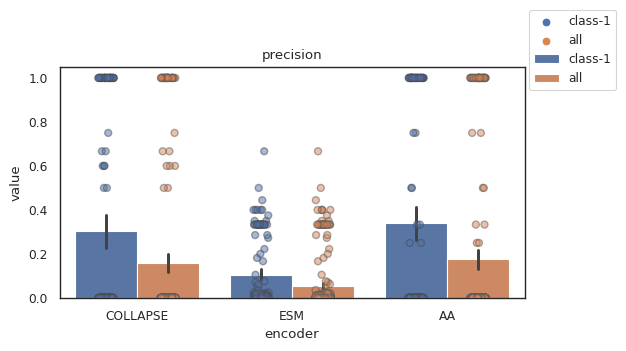

<Figure size 640x480 with 0 Axes>

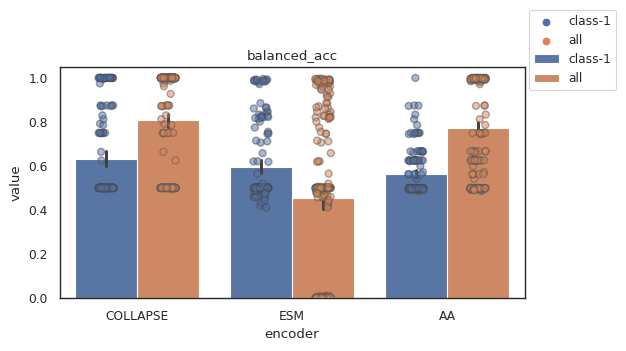

<Figure size 640x480 with 0 Axes>

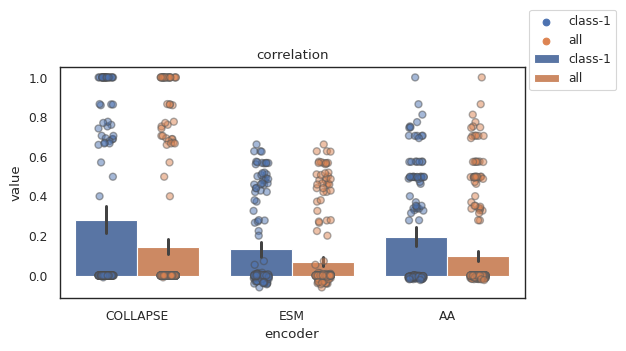

<Figure size 640x480 with 0 Axes>

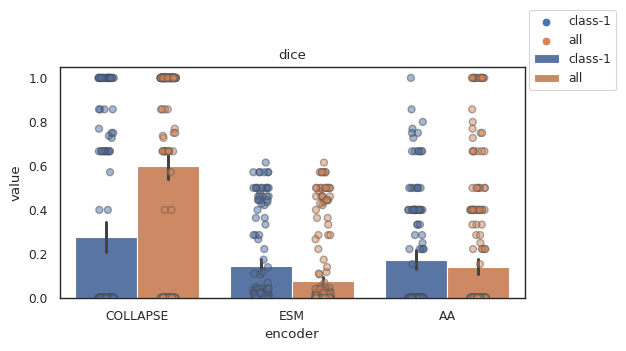

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 640x480 with 0 Axes>

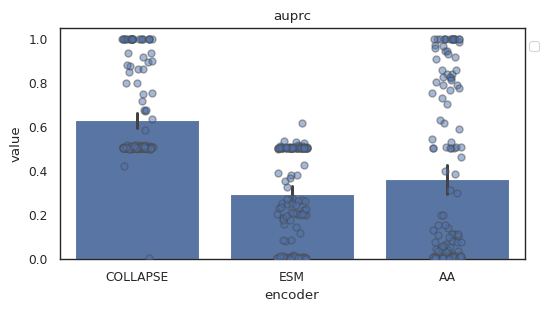

In [178]:
for met in test_metrics:
    subdf = full_df[full_df.metric == met].reset_index()

    plt.clf()
    setup_figure()
    if met == 'auprc':
        ax = sns.barplot(data=subdf[subdf.regime == 'all'], x='encoder', y='value', color=sns.color_palette()[0])
        sns.stripplot(data=subdf[subdf.regime == 'all'], x='encoder', y='value',  dodge=True, alpha=0.5, linewidth=1, ax=ax, color=sns.color_palette()[0])
    else:
        ax = sns.barplot(data=subdf, x='encoder', y='value', hue='regime')
        sns.stripplot(data=subdf, x='encoder', y='value', hue='regime', dodge=True, alpha=0.5, linewidth=1, ax=ax)
    plt.title(met)
    plt.legend(loc=(1.01,0.9))
    plt.show()